# Data Analysis

## Import Packages and Prepare Data

In [216]:
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from pandas import option_context
from statsmodels.iolib.summary2 import summary_col

import warnings
warnings.simplefilter('ignore')

In [217]:
df = pd.read_csv('covid_data_final_with_scores.csv', low_memory=False)
df.head()

,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var,clean_post,Liberty/oppression
0,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 13:00:28 EDT,...,-0.121268,-0.095777,0.006735,-0.070749,-0.175241,0.777778,0.000574,0.004499,pair us senator ask biden administration inter...,0.285714
1,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 09:27:09 EDT,...,-0.120624,-0.086392,-0.081137,-0.065666,-0.057119,0.777778,0.000388,0.000599,stark disparity low high vaccination area some...,0.448980
2,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 09:15:16 EDT,...,-0.126078,-0.013716,-0.024528,0.061423,0.024422,1.166667,0.000080,0.004956,we surgeon general dr vivek murthy say concern...,0.505669
3,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 06:30:09 EDT,...,-0.225778,-0.271310,-0.171173,-0.157422,-0.168818,1.000000,0.000757,0.002340,kim jong un fire several senior official fail ...,0.357143
4,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,2021-06-30 00:32:08 EDT,...,-0.005410,-0.126836,0.119250,0.061201,-0.044982,0.750000,0.004427,0.009026,many way pandemic perfect storm low income hou...,0.510204


In [218]:
# generate radom number to post id.
def generate_id(s):
    return abs(hash(s)) % (10 ** 10)

df.insert(0, "Post Id", df['Post Created'].apply(generate_id), True)

In [219]:
df.head()

,Post Id,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,care_sent,fairness_sent,loyalty_sent,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var,clean_post,Liberty/oppression
0,8171486211,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,-0.121268,-0.095777,0.006735,-0.070749,-0.175241,0.777778,0.000574,0.004499,pair us senator ask biden administration inter...,0.285714
1,8599684032,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,-0.120624,-0.086392,-0.081137,-0.065666,-0.057119,0.777778,0.000388,0.000599,stark disparity low high vaccination area some...,0.448980
2,6101959841,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,-0.126078,-0.013716,-0.024528,0.061423,0.024422,1.166667,0.000080,0.004956,we surgeon general dr vivek murthy say concern...,0.505669
3,5887957394,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,-0.225778,-0.271310,-0.171173,-0.157422,-0.168818,1.000000,0.000757,0.002340,kim jong un fire several senior official fail ...,0.357143
4,9679052873,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,-0.005410,-0.126836,0.119250,0.061201,-0.044982,0.750000,0.004427,0.009026,many way pandemic perfect storm low income hou...,0.510204


In [220]:
word_count = []
# count number of word in each row of the column of "Message"
split_string = df['Message'].str.split()
for string in split_string:
    words = len(string)
    word_count.append(words)     

In [221]:
# create a new column and gives it the value of the right side. 
df['word_count'] = word_count

In [222]:
df['Post Created Date'] = pd.to_datetime(df['Post Created Date'])
df['Page Created'] = pd.to_datetime(df['Page Created'])

df['Post_Created_Month'] = df['Post Created Date'].dt.month
df['Page_Created_Month'] = df['Page Created'].dt.month

In [223]:
## Extract data for 1st jan 2020 to 30th June 2021
extract = (df['Post Created Date'] > '01-01-2020') & (df['Post Created Date'] <= '30-06-2021')

df = df.loc[extract]
df.head()

,Post Id,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,authority_sent,sanctity_sent,moral_nonmoral_ratio,f_var,sent_var,clean_post,Liberty/oppression,word_count,Post_Created_Month,Page_Created_Month
0,8171486211,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,-0.070749,-0.175241,0.777778,0.000574,0.004499,pair us senator ask biden administration inter...,0.285714,27,6,11
1,8599684032,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,-0.065666,-0.057119,0.777778,0.000388,0.000599,stark disparity low high vaccination area some...,0.448980,32,6,11
2,6101959841,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,0.061423,0.024422,1.166667,0.000080,0.004956,we surgeon general dr vivek murthy say concern...,0.505669,58,6,11
3,5887957394,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,-0.157422,-0.168818,1.000000,0.000757,0.002340,kim jong un fire several senior official fail ...,0.357143,16,6,11
4,9679052873,CNN,cnn,5550296508,MEDIA_NEWS_COMPANY,US,Instant breaking news alerts and the most talk...,2007-11-07 22:14:27,34563652.0,38358192.0,...,0.061201,-0.044982,0.750000,0.004427,0.009026,many way pandemic perfect storm low income hou...,0.510204,12,6,11


In [224]:
# rename the column
df['liberty_p'] = df['Liberty/oppression']

In [225]:
# change missing to 0
df['liberty_p'] = df['liberty_p'].fillna(0)

In [226]:
df2 = pd.DataFrame()

df2[["Post Id", 'Facebook Id','Post Created Date','care_p', 'fairness_p', 'loyalty_p','authority_p', 
         'sanctity_p', 'Likes', 'Comments', 'Angry', 'PN', 'LNC_category', 'Page Created', 'Type', 'Message', 'word_count','Followers_at_Posting',  'Post_Created_Month', 'Page_Created_Month', 'liberty_p']] = df[["Post Id", 'Facebook Id', 'Post Created Date','care_p', 'fairness_p', 'loyalty_p','authority_p', 
         'sanctity_p', 'Likes', 'Comments', 'Angry', 'PN', 'LNC_category', 'Page Created', 'Type', 'Message', 'word_count', 'Followers at Posting', 'Post_Created_Month', 'Page_Created_Month', 'liberty_p']]

## Correlation of Features

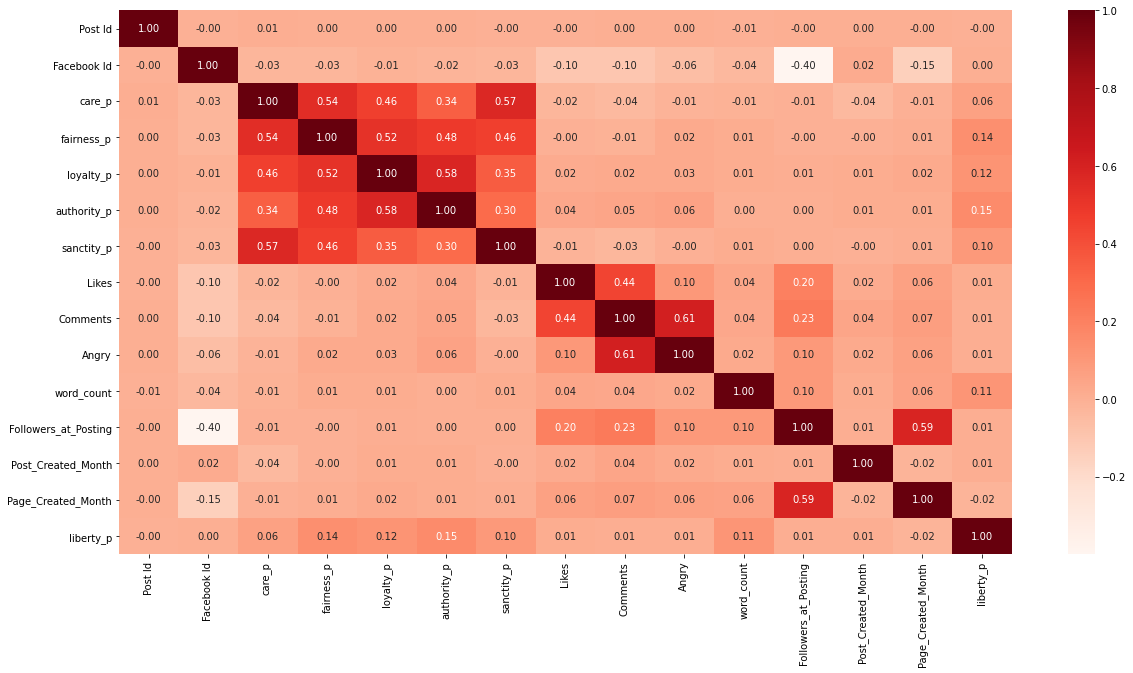

In [227]:
corr = df2.corr()
#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, fmt='.2f')
plt.show()

<font size = 3><b>Further Elaboration of Correlation:</font></b>

The correlation coefficient has values between -1 to 1.

    A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
    A value closer to 1 implies stronger positive correlation 
    A value closer to -1 implies stronger negative correlation  

## Distribution of Data

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83387 entries, 0 to 84369
Data columns (total 65 columns):
 #   Column                                                                                                                Non-Null Count  Dtype         
---  ------                                                                                                                --------------  -----         
 0   Post Id                                                                                                               83387 non-null  int64         
 1   Page Name                                                                                                             83387 non-null  object        
 2   User Name                                                                                                             83387 non-null  object        
 3   Facebook Id                                                                                                         

In [229]:
# check the top 10 postings based on each moral score

with option_context('display.max_colwidth', 400):
    display(df2.sort_values(by="liberty_p", ascending=False).head(10))

,Post Id,Facebook Id,Post Created Date,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,Likes,Comments,...,PN,LNC_category,Page Created,Type,Message,word_count,Followers_at_Posting,Post_Created_Month,Page_Created_Month,liberty_p
11054,5869330049,10643211755,2020-07-30,0.077947,0.092951,0.066898,0.102976,0.086036,545,151,...,N,liberal,2008-02-21 00:53:35,Link,"Listen to Billie Eilish's new song ""My Future."" Written and recorded in Los Angeles during lockdown, it's a dreamy ode to freedom.",22,7697756.0,7,2,0.897959
64417,4461439582,114050161948682,2020-09-28,0.111493,0.090084,0.073302,0.106115,0.086640,53,6,...,N,neutral,2010-04-16 17:16:47,Link,"Oil prices dipped on Monday as rising coronavirus cases upset hopes for a smooth recovery in fuel demand, with the main crude benchmarks on track for their first monthly falls in multiple months after last week's slips.",37,4828649.0,9,4,0.877551
7506,9063435717,1143803202301544,2020-07-30,0.099760,0.070682,0.079317,0.045703,0.120629,693,34,...,NaN,liberal,2015-07-10 09:17:45,Native Video,"""Bob is my life"" Margaret and Bob have been married 63 years. This is their lockdown story ♥️",18,3012570.0,7,7,0.877551
47271,4716809306,95475020353,2020-08-24,0.097821,0.082364,0.073214,0.068310,0.065440,93,347,...,N,conservative,2008-11-10 23:31:33,Link,"An official at Yale University told students in an email last week that they should prepare for their peers to die from the Chinese coronavirus and that their college life will look ""like a hospital unit.""",36,5274462.0,8,11,0.877551
54615,2057455903,8304333127,2020-04-19,0.211250,0.109186,0.146564,0.079210,0.146419,48,21,...,NaN,neutral,2008-02-11 22:26:53,Link,"A family of RV nomads hit the road for life. The coronavirus has stranded them in Gila Bend, Arizona.",19,6499041.0,4,2,0.877551
20568,3301342483,13652355666,2020-04-21,0.139899,0.097175,0.084907,0.083955,0.136305,339,34,...,NaN,neutral,2008-04-09 18:29:16,Native Video,True Life: Quarantined with kids.,5,8417975.0,4,4,0.877551
20304,6986222464,13652355666,2020-05-12,0.128249,0.116088,0.095569,0.116875,0.093022,252,54,...,N,neutral,2008-04-09 18:29:16,Link,"With anemic passenger counts and no signs travel will rebound quickly from the coronavirus pandemic, airlines are fighting for their financial lives",22,8464123.0,5,4,0.877551
15491,2655764759,6250307292,2020-10-04,0.105722,0.085761,0.059236,0.058553,0.107651,1010,799,...,N,liberal,2007-11-07 18:26:05,Link,"At this stage in the novel coronavirus pandemic, masks are a fact of life.",14,6761376.0,10,11,0.877551
67405,6432452602,114050161948682,2020-07-17,0.122163,0.098451,0.090003,0.085617,0.070483,28,2,...,P,neutral,2010-04-16 17:16:47,Link,"European Union leaders met on Friday for tense summit talks on a multi-billion-euro plan to breathe life into their economies, their first face-to-face meeting since the coronavirus pandemic plunged the bloc into its latest crisis.",35,4757983.0,7,4,0.877551
15695,438208914,6250307292,2020-08-26,0.148537,0.102986,0.104537,0.094955,0.092626,771,387,...,N,liberal,2007-11-07 18:26:05,Link,"On the coronavirus pandemic, Black Lives Matter and women, he and the speakers are sticking with the same old rhetoric.",20,6965293.0,8,11,0.877551


In [230]:
with option_context('display.max_colwidth', 400):
    display(df2.sort_values(by="care_p", ascending=False).head(10))

,Post Id,Facebook Id,Post Created Date,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,Likes,Comments,...,PN,LNC_category,Page Created,Type,Message,word_count,Followers_at_Posting,Post_Created_Month,Page_Created_Month,liberty_p
20836,2591492350,13652355666,2020-04-02,0.358108,0.213740,0.124183,0.177914,0.165354,298,58,...,NaN,neutral,2008-04-09 18:29:16,Link,"No, coronavirus is not in the flu shot.",8,8339393.0,4,4,0.000000
49644,1645086546,8304333127,2021-03-30,0.358108,0.213740,0.124183,0.177914,0.165354,512,374,...,NaN,neutral,2008-02-11 22:26:53,Link,"As Covid-19 vaccinations ramp up, hesitancy among Americans to get the shot is waning.",14,6806559.0,3,2,0.591837
23438,1018378343,273864989376427,2020-12-26,0.352399,0.192571,0.278307,0.131650,0.096639,40,278,...,NaN,liberal,2012-05-14 16:26:44,Link,"Rachel Maddow explains how a ""pocket veto"" by Pres. Trump could doom a Covid-19 relief bill for weeks.",18,2528564.0,12,5,0.523810
23452,6029193307,273864989376427,2020-12-25,0.352399,0.192571,0.278307,0.131650,0.096639,35,265,...,NaN,liberal,2012-05-14 16:26:44,Link,"Rachel Maddow explains how a ""pocket veto"" by Pres. Trump could doom a Covid-19 relief bill for weeks.",18,2528400.0,12,5,0.523810
41489,9268119755,140738092630206,2020-04-11,0.349398,0.200000,0.131313,0.193548,0.292683,109,41,...,NaN,conservative,2010-08-18 23:57:09,Link,"""COVID-19 is racist""",3,2142190.0,4,8,0.000000
2146,8955104889,5550296508,2020-11-17,0.348892,0.197506,0.229534,0.144973,0.204730,851,548,...,NaN,liberal,2007-11-07 22:14:27,Link,"""Two more down in our ward... This is how Covid-19 is killing everybody.""",13,37280693.0,11,11,0.000000
84067,9826787655,367116489976035,2020-04-12,0.333333,0.062500,0.187500,0.076923,0.111111,1729,983,...,NaN,science,2012-03-09 18:16:30,Link,Coronaviruses have been infecting humans for decades.,7,24402959.0,4,3,0.510204
41140,6531983644,140738092630206,2021-05-18,0.321361,0.183679,0.192053,0.123174,0.101884,11,27,...,NaN,conservative,2010-08-18 23:57:09,Link,NY Gov. Cuomo set to pocket more than $5M from COVID-19 leadership book,13,2743278.0,5,8,0.632653
27715,5870264678,273864989376427,2020-06-19,0.304878,0.139535,0.125000,0.123457,0.061856,271,885,...,NaN,liberal,2012-05-14 16:26:44,Link,"The CDC raises projected COVID-19 deaths to 145,000 by mid July.",11,2499627.0,6,5,0.510204
27709,2786532456,273864989376427,2020-06-20,0.304878,0.139535,0.125000,0.123457,0.061856,175,476,...,NaN,liberal,2012-05-14 16:26:44,Link,"The CDC raises projected COVID-19 deaths to 145,000 in the US by mid July.",14,2499834.0,6,5,0.591837


In [231]:
with option_context('display.max_colwidth', 400):
    display(df2.sort_values(by="fairness_p", ascending=False).head(10))

,Post Id,Facebook Id,Post Created Date,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,Likes,Comments,...,PN,LNC_category,Page Created,Type,Message,word_count,Followers_at_Posting,Post_Created_Month,Page_Created_Month,liberty_p
41126,6044786270,140738092630206,2021-05-25,0.129032,0.350000,0.210526,0.240000,0.166667,53,50,...,NaN,conservative,2010-08-18 23:57:09,Link,Whitmer lifts COVID-19 restriction she was busted violating over the weekend,11,2746437.0,5,8,0.510204
24612,4780650219,273864989376427,2020-11-19,0.247383,0.339720,0.262241,0.097118,0.166258,24,94,...,N,liberal,2012-05-14 16:26:44,Link,Economist Betsey Stevenson discusses why women have been disproportionately impacted by unemployment amid the coronavirus pandemic.,16,2517124.0,11,5,0.000000
78555,873679260,235877164588,2021-06-05,0.142857,0.333333,0.100000,0.312500,0.281250,15,1,...,NaN,science,2010-01-04 15:10:07,Link,Coronavirus: WHO announces Greek alphabet naming scheme for variants https://bit.ly/3ikQGq7:=:https://www.newscientist.com/article/2279063-coronavirus-who-announces-greek-alphabet-naming-scheme-for-variants/?utm_term=Autofeed&utm_campaign=echobox&utm_medium=social&utm_source=Facebook#Echobox=1622874739,10,3539110.0,6,1,0.585034
78587,6624069742,235877164588,2021-06-01,0.142857,0.333333,0.100000,0.312500,0.281250,15,2,...,NaN,science,2010-01-04 15:10:07,Link,Coronavirus: WHO announces Greek alphabet naming scheme for variants https://bit.ly/3vGf8pP:=:https://www.newscientist.com/article/2279063-coronavirus-who-announces-greek-alphabet-naming-scheme-for-variants/?utm_campaign=echobox&utm_medium=social&utm_source=Facebook#Echobox=1622566270-1,10,3539749.0,6,1,0.663265
78566,1239210094,235877164588,2021-06-04,0.142857,0.333333,0.100000,0.312500,0.281250,7,0,...,NaN,science,2010-01-04 15:10:07,Link,Coronavirus: WHO announces Greek alphabet naming scheme for variants https://bit.ly/3z3fclO:=:https://www.newscientist.com/article/2279063-coronavirus-who-announces-greek-alphabet-naming-scheme-for-variants/?utm_term=Autofeed&utm_campaign=echobox&utm_medium=social&utm_source=Facebook#Echobox=1622785598,10,3539239.0,6,1,0.585034
78573,1155648284,235877164588,2021-06-03,0.142857,0.333333,0.100000,0.312500,0.281250,7,3,...,NaN,science,2010-01-04 15:10:07,Link,Coronavirus: WHO announces Greek alphabet naming scheme for variants https://bit.ly/3fJj4AN:=:https://www.newscientist.com/article/2279063-coronavirus-who-announces-greek-alphabet-naming-scheme-for-variants/?utm_term=Autofeed&utm_campaign=echobox&utm_medium=social&utm_source=Facebook#Echobox=1622654018,10,3539415.0,6,1,0.585034
80948,3007752202,14482400667,2021-06-08,0.189189,0.313725,0.232558,0.234043,0.266667,96,39,...,NaN,science,2008-04-23 04:18:42,Photo,"Nope, it's not a HIPAA violation: bit.ly/3ihs5CH:=:https://www.health.com/condition/infectious-diseases/coronavirus/is-it-a-hipaa-violation-to-ask-about-covid-vaccine?utm_campaign=health_health&utm_content=photo&utm_medium=social&utm_source=facebook.com&utm_term={{.ShareRef}}",7,6337787.0,6,4,0.585034
80951,3337347030,14482400667,2021-06-03,0.189189,0.313725,0.232558,0.234043,0.266667,52,5,...,NaN,science,2008-04-23 04:18:42,Photo,"Nope, it's not a HIPAA violation: bit.ly/3ihs5CH:=:https://www.health.com/condition/infectious-diseases/coronavirus/is-it-a-hipaa-violation-to-ask-about-covid-vaccine?utm_campaign=health_health&utm_content=photo&utm_medium=social&utm_source=facebook.com&utm_term={{.ShareRef}}",7,6338581.0,6,4,0.585034
8455,1598316043,43179984254,2020-03-20,0.121951,0.282051,0.133333,0.122449,0.103448,87,89,...,NaN,liberal,2009-01-10 01:42:46,Link,Richard Burr must resign for coronavirus insider trading.,8,1243203.0,3,1,0.714286
18619,7207873812,13652355666,2020-12-14,0.032258,0.280000,0.166667,0.133333,0.047619,704,97,...,NaN,neutral,2008-04-09 18:29:16,Native Video,The COVID-19 vaccine distribution has begun in the U.S. https://bit.ly/3nlilHd:=:https://www.usatoday.com/story/news/health/2020/12/02/covid-vaccine-pfizer-moderna-astrazeneca

In [232]:
with option_context('display.max_colwidth', 400):
    display(df2.sort_values(by="loyalty_p", ascending=False).head(10))

,Post Id,Facebook Id,Post Created Date,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,Likes,Comments,...,PN,LNC_category,Page Created,Type,Message,word_count,Followers_at_Posting,Post_Created_Month,Page_Created_Month,liberty_p
16890,7981641520,6250307292,2020-04-04,0.194444,0.117647,0.333333,0.190476,0.043478,172,187,...,N,liberal,2007-11-07 18:26:05,Link,"The novel coronavirus outbreak has already canceled or postponed the NCAA tournament, the Olympics and Wimbledon. It has jeopardized the NBA playoffs, the Stanley Cup playoffs, the Masters and the baseball and soccer seasons.",34,6496525.0,4,11,0.000000
23438,1018378343,273864989376427,2020-12-26,0.352399,0.192571,0.278307,0.131650,0.096639,40,278,...,NaN,liberal,2012-05-14 16:26:44,Link,"Rachel Maddow explains how a ""pocket veto"" by Pres. Trump could doom a Covid-19 relief bill for weeks.",18,2528564.0,12,5,0.523810
23452,6029193307,273864989376427,2020-12-25,0.352399,0.192571,0.278307,0.131650,0.096639,35,265,...,NaN,liberal,2012-05-14 16:26:44,Link,"Rachel Maddow explains how a ""pocket veto"" by Pres. Trump could doom a Covid-19 relief bill for weeks.",18,2528400.0,12,5,0.523810
50927,3209788994,8304333127,2020-12-24,0.280000,0.268293,0.275000,0.148148,0.115385,233,146,...,NaN,neutral,2008-02-11 22:26:53,Link,Drugstores and groceries are rushing to hire tens of thousands of pharmacists and technicians to administer Covid-19 vaccines to the masses next year.,23,6701408.0,12,2,0.000000
50962,9218434140,8304333127,2020-12-22,0.280000,0.268293,0.275000,0.148148,0.115385,284,209,...,NaN,neutral,2008-02-11 22:26:53,Link,U.S. drugstores and groceries are rushing to hire tens of thousands of pharmacists and technicians to administer Covid-19 vaccines to the masses next year.,24,6700714.0,12,2,0.000000
24612,4780650219,273864989376427,2020-11-19,0.247383,0.339720,0.262241,0.097118,0.166258,24,94,...,N,liberal,2012-05-14 16:26:44,Link,Economist Betsey Stevenson discusses why women have been disproportionately impacted by unemployment amid the coronavirus pandemic.,16,2517124.0,11,5,0.000000
48236,2244099433,95475020353,2020-03-26,0.205955,0.130952,0.259259,0.164103,0.185714,300,367,...,NaN,conservative,2008-11-10 23:31:33,Link,The US is relying on rubber glove imports from mostly Malaysia and Thailand in the midst of the Chinese coronavirus.,20,4108615.0,3,11,0.673469
83153,2150472871,121006699371,2020-08-01,0.187500,0.241379,0.250000,0.413793,0.185185,21,0,...,NaN,science,2009-08-27 16:48:06,Link,"Even if you're still under lockdown, there's another self-revenge trend — bedtime procrastination",13,3211865.0,8,8,0.469388
41501,6184339927,140738092630206,2020-04-07,0.111111,0.218750,0.238095,0.114286,0.133333,43,62,...,NaN,conservative,2010-08-18 23:57:09,Link,The Virginia Democrat was demonstrating proper application amid the COVID-19 outbreak,11,2140083.0,4,8,0.551020
4158,9834109124,5550296508,2020-06-12,0.152542,0.205479,0.237500,0.133333,0.166667,1480,1430,...,N,liberal,2007-11-07 22:14:27,Link,They can't even blame the coronavirus pandemic for this one,10,37268981.0,6,11,0.469388


In [233]:
with option_context('display.max_colwidth', 400):
    display(df2.sort_values(by="authority_p", ascending=False).head(10))

,Post Id,Facebook Id,Post Created Date,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,Likes,Comments,...,PN,LNC_category,Page Created,Type,Message,word_count,Followers_at_Posting,Post_Created_Month,Page_Created_Month,liberty_p
83153,2150472871,121006699371,2020-08-01,0.187500,0.241379,0.250000,0.413793,0.185185,21,0,...,NaN,science,2009-08-27 16:48:06,Link,"Even if you're still under lockdown, there's another self-revenge trend — bedtime procrastination",13,3211865.0,8,8,0.469388
41369,4087765798,140738092630206,2020-08-19,0.046980,0.136612,0.089655,0.321429,0.081481,129,194,...,NaN,conservative,2010-08-18 23:57:09,Link,Has anyone checked to see if he has the authority to do that? https://bit.ly/3gf2aXw:=:https://www.theblaze.com/news/garcetti-utilities-influencer-mansion-lockdown?utm_content=bufferb3aae&utm_medium=referral&utm_source=facebook&utm_campaign=fb-theblaze,14,2523856.0,8,8,0.700680
78555,873679260,235877164588,2021-06-05,0.142857,0.333333,0.100000,0.312500,0.281250,15,1,...,NaN,science,2010-01-04 15:10:07,Link,Coronavirus: WHO announces Greek alphabet naming scheme for variants https://bit.ly/3ikQGq7:=:https://www.newscientist.com/article/2279063-coronavirus-who-announces-greek-alphabet-naming-scheme-for-variants/?utm_term=Autofeed&utm_campaign=echobox&utm_medium=social&utm_source=Facebook#Echobox=1622874739,10,3539110.0,6,1,0.585034
78573,1155648284,235877164588,2021-06-03,0.142857,0.333333,0.100000,0.312500,0.281250,7,3,...,NaN,science,2010-01-04 15:10:07,Link,Coronavirus: WHO announces Greek alphabet naming scheme for variants https://bit.ly/3fJj4AN:=:https://www.newscientist.com/article/2279063-coronavirus-who-announces-greek-alphabet-naming-scheme-for-variants/?utm_term=Autofeed&utm_campaign=echobox&utm_medium=social&utm_source=Facebook#Echobox=1622654018,10,3539415.0,6,1,0.585034
78566,1239210094,235877164588,2021-06-04,0.142857,0.333333,0.100000,0.312500,0.281250,7,0,...,NaN,science,2010-01-04 15:10:07,Link,Coronavirus: WHO announces Greek alphabet naming scheme for variants https://bit.ly/3z3fclO:=:https://www.newscientist.com/article/2279063-coronavirus-who-announces-greek-alphabet-naming-scheme-for-variants/?utm_term=Autofeed&utm_campaign=echobox&utm_medium=social&utm_source=Facebook#Echobox=1622785598,10,3539239.0,6,1,0.585034
78587,6624069742,235877164588,2021-06-01,0.142857,0.333333,0.100000,0.312500,0.281250,15,2,...,NaN,science,2010-01-04 15:10:07,Link,Coronavirus: WHO announces Greek alphabet naming scheme for variants https://bit.ly/3vGf8pP:=:https://www.newscientist.com/article/2279063-coronavirus-who-announces-greek-alphabet-naming-scheme-for-variants/?utm_campaign=echobox&utm_medium=social&utm_source=Facebook#Echobox=1622566270-1,10,3539749.0,6,1,0.663265
1550,1084096663,5550296508,2020-12-29,0.178551,0.154903,0.161415,0.308849,0.107817,9527,7209,...,NaN,liberal,2007-11-07 22:14:27,Link,"Congressman-elect Luke Letlow, 41, a Republican from Louisiana, has died after being diagnosed with Covid-19",15,38559762.0,12,11,0.551020
18448,2839166908,13652355666,2020-12-30,0.178551,0.154903,0.161415,0.308849,0.107817,267,191,...,NaN,neutral,2008-04-09 18:29:16,Native Video,Louisiana Congressman-elect Luke Letlow has died with COVID-19. https://bit.ly/38PP0yL:=:https://www.usatoday.com/story/news/politics/2020/12/29/luke-letlow-louisiana-congressman-elect-dies-covid/4083293001/,9,8939588.0,12,4,0.551020
42906,7521611300,15704546335,2020-12-22,0.133618,0.183370,0.159886,0.306369,0.134107,1706,6428,...,N,conservative,2008-04-30 18:26:36,Photo,"President-elect Joe Biden fist bumps with nurse practitioner Tabe Mase after receiving his first dose of the coronavirus vaccine in Newark, Delaware, Monday. https://fxn.ws/34zX5pN:=:https://www.foxnews.com/politics/biden-receives-covid-19-vaccination",24,22377804.0,12,4,0.551020
68617,1523394932,114050161948682,2020-06-22,0.118056,0.109005,0.176471,0.298165,0.088608,148,257,...,P,neutral,2010-04-16 17:16:47,Link,"China’s notorious dog-meat festival opens, but acti

In [234]:
with option_context('display.max_colwidth', 400):
    display(df2.sort_values(by="sanctity_p", ascending=False).head(10))

,Post Id,Facebook Id,Post Created Date,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,Likes,Comments,...,PN,LNC_category,Page Created,Type,Message,word_count,Followers_at_Posting,Post_Created_Month,Page_Created_Month,liberty_p
21192,5820282932,13652355666,2020-03-12,0.186667,0.166667,0.216667,0.075758,0.342466,41073,20692,...,NaN,neutral,2008-04-09 18:29:16,Native Video,There's something spreading faster than the coronavirus: Racism and microaggressions.,10,8260800.0,3,4,0.673469
21042,9070445477,13652355666,2020-03-22,0.186667,0.166667,0.216667,0.075758,0.342466,1006,950,...,NaN,neutral,2008-04-09 18:29:16,Native Video,There's something spreading faster than the coronavirus: Racism and microaggressions.,10,8290154.0,3,4,0.673469
66148,7816444690,114050161948682,2020-08-11,0.180707,0.075000,0.047269,0.020000,0.339286,69,6,...,NaN,neutral,2010-04-16 17:16:47,Link,Coronavirus infections stabilise in Australia's virus epicentre https://reut.rs/3fJPaJd:=:https://www.reuters.com/article/us-health-coronavirus-australia-state/coronavirus-infections-stabilise-in-australias-virus-epicentre-idUSKCN2562S7?utm_medium=Social&utm_source=Facebook,8,4838054.0,8,4,0.663265
46757,4221899931,95475020353,2021-03-03,0.140000,0.177778,0.170213,0.166667,0.295082,605,1356,...,NaN,conservative,2008-11-10 23:31:33,Link,Is this a diversion from Andrew Cuomo’s catastrophic coronavirus scandal?,10,5181136.0,3,11,0.000000
41489,9268119755,140738092630206,2020-04-11,0.349398,0.200000,0.131313,0.193548,0.292683,109,41,...,NaN,conservative,2010-08-18 23:57:09,Link,"""COVID-19 is racist""",3,2142190.0,4,8,0.000000
47782,4423104770,95475020353,2020-04-27,0.210980,0.116667,0.163889,0.096018,0.287304,83,730,...,NaN,conservative,2008-11-10 23:31:33,Link,“Unhooded and Exposed: What COVID-19 Reveals about Racism in America.”,10,4216534.0,4,11,0.663265
78573,1155648284,235877164588,2021-06-03,0.142857,0.333333,0.100000,0.312500,0.281250,7,3,...,NaN,science,2010-01-04 15:10:07,Link,Coronavirus: WHO announces Greek alphabet naming scheme for variants https://bit.ly/3fJj4AN:=:https://www.newscientist.com/article/2279063-coronavirus-who-announces-greek-alphabet-naming-scheme-for-variants/?utm_term=Autofeed&utm_campaign=echobox&utm_medium=social&utm_source=Facebook#Echobox=1622654018,10,3539415.0,6,1,0.585034
78555,873679260,235877164588,2021-06-05,0.142857,0.333333,0.100000,0.312500,0.281250,15,1,...,NaN,science,2010-01-04 15:10:07,Link,Coronavirus: WHO announces Greek alphabet naming scheme for variants https://bit.ly/3ikQGq7:=:https://www.newscientist.com/article/2279063-coronavirus-who-announces-greek-alphabet-naming-scheme-for-variants/?utm_term=Autofeed&utm_campaign=echobox&utm_medium=social&utm_source=Facebook#Echobox=1622874739,10,3539110.0,6,1,0.585034
78566,1239210094,235877164588,2021-06-04,0.142857,0.333333,0.100000,0.312500,0.281250,7,0,...,NaN,science,2010-01-04 15:10:07,Link,Coronavirus: WHO announces Greek alphabet naming scheme for variants https://bit.ly/3z3fclO:=:https://www.newscientist.com/article/2279063-coronavirus-who-announces-greek-alphabet-naming-scheme-for-variants/?utm_term=Autofeed&utm_campaign=echobox&utm_medium=social&utm_source=Facebook#Echobox=1622785598,10,3539239.0,6,1,0.585034
78587,6624069742,235877164588,2021-06-01,0.142857,0.333333,0.100000,0.312500,0.281250,15,2,...,NaN,science,2010-01-04 15:10:07,Link,Coronavirus: WHO announces Greek alphabet naming scheme for variants https://bit.ly/3vGf8pP:=:https://www.newscientist.com/article/2279063-coronavirus-who-announces-greek-alphabet-naming-scheme-for-variants/?utm_campaign=echobox&utm_medium=social&utm_source=Facebook#Echobox=1622566270-1,10,3539749.0,6,1,0.663265


__Inferece:__ Taking log-transform normalization of all independent variables to handle highly skewed pattern.

In [235]:
df['log_Likes'] = np.log(df2['Likes']+1)
df['log_comments'] = np.log(df2['Comments']+1)
df['log_Angry'] = np.log(df2['Angry']+1)

In [236]:
df2['log_Likes'] = np.log(df2['Likes']+1)
df2['log_comments'] = np.log(df2['Comments']+1)
df2['log_Angry'] = np.log(df2['Angry']+1)

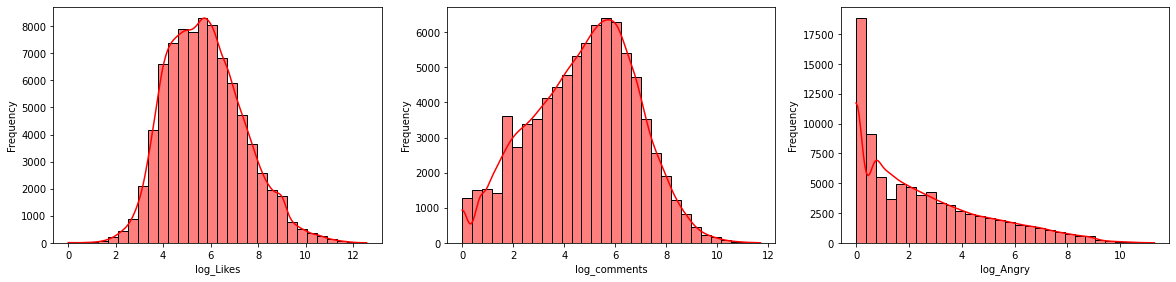

In [237]:
plt.figure(figsize=(20, 20))

for e, column in enumerate(['log_Likes', 'log_comments', 'log_Angry']):
    plt.subplot(4, 3, e + 1)
    sns.histplot(df[column],bins=30,color="r", kde=True)
    plt.ylabel('Frequency')

## Regressions on Full Data & Subgroups

In [238]:
# Sort data by ascending order in dates
df2.sort_values(by="Post Created Date", inplace = True)

df2['Month'] = pd.PeriodIndex(df2['Post Created Date'], freq='M')
df2['Month'] = (pd.factorize(df2['Month'])[0]+1)

df2['Quarter'] = pd.PeriodIndex(df2['Post Created Date'], freq='Q')
df2['Quarter'] = (pd.factorize(df2['Quarter'])[0]+1)


df2.head()

,Post Id,Facebook Id,Post Created Date,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,Likes,Comments,...,word_count,Followers_at_Posting,Post_Created_Month,Page_Created_Month,liberty_p,log_Likes,log_comments,log_Angry,Month,Quarter
55944,1429011956,8304333127,2020-01-04,0.151182,0.131986,0.092913,0.124744,0.101861,24,9,...,38,6388174.0,1,2,0.486395,3.218876,2.302585,0.000000,1,1
17552,4907994623,6250307292,2020-01-04,0.139718,0.152007,0.098506,0.108446,0.090964,57,46,...,17,6393562.0,1,11,0.622449,4.060443,3.850148,4.382027,1,1
7298,1606335496,5550296508,2020-01-06,0.073341,0.069115,0.070394,0.062277,0.060054,5656,396,...,24,32377225.0,1,11,0.455782,8.640649,5.983936,1.609438,1,1
84369,5867773238,22297920245,2020-01-07,0.141509,0.089883,0.096716,0.067258,0.098851,249,43,...,38,3188236.0,1,2,0.544218,5.521461,3.784190,0.000000,1,1
82990,3190483508,96191425588,2020-01-07,0.060196,0.073566,0.063035,0.067256,0.075781,864,34,...,38,4060776.0,1,4,0.357143,6.762730,3.555348,0.000000,1,1


In [239]:
# For full sample
full_sample = smf.mixedlm("log_Likes ~ care_p + fairness_p + loyalty_p + authority_p + sanctity_p + liberty_p+\
                        Post_Created_Month+ Page_Created_Month + word_count + C(Type) + C(PN) + Followers_at_Posting + C(LNC_category)", 
data = df2.dropna(), groups= "Facebook Id").fit()
print("Model: ", 1)
print(full_sample.summary())


Model:  1
                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       log_Likes  
No. Observations:       60703         Method:                   REML       
No. Groups:             37            Scale:                    1.3989     
Min. group size:        1             Log-Likelihood:           -96453.8885
Max. group size:        17639         Converged:                Yes        
Mean group size:        1640.6                                             
---------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        5.627    0.791   7.111 0.000  4.076  7.178
C(Type)[T.Live Video Complete]  -1.572    0.102 -15.412 0.000 -1.771 -1.372
C(Type)[T.Live Video Scheduled] -1.626    0.147 -11.034 0.000 -1.915 -1.337
C(Type)[T.Native Vide

In [240]:
# # run the analyses separated by every three months 

# for i in range(1, 19):  #it will iterate from 1-18   
    
#     ## Get data for each time interval
#     df_month = df2.dropna().loc[df2['Month'] == i]

#     # Regression model for each time interval
#     model = smf.mixedlm("log_Likes ~ care_p + fairness_p + loyalty_p + authority_p + sanctity_p + liberty_p+\
#                             Post_Created_Month+ Page_Created_Month + word_count + C(Type) + C(PN) + Followers_at_Posting + C(LNC_category)", data = df_month, groups= "Facebook Id").fit()
#     print("Model: ", i)
#     print(model.summary())

In [241]:
liberal_data = df2[df2['LNC_category'] == 'liberal']
conservative_data = df2[df2['LNC_category'] == 'conservative']
neutral_data = df2[df2['LNC_category'] == 'neutral']
science_data = df2[df2['LNC_category'] == 'science']

In [242]:
# for sub groups
i = 2
Models_1 =[]
for df3 in [liberal_data, conservative_data, neutral_data, science_data]:
    model = smf.mixedlm("log_Likes ~ care_p + fairness_p + loyalty_p + authority_p + sanctity_p + liberty_p+\
                        Post_Created_Month+ Page_Created_Month  + word_count + C(Type) + + C(PN) + Followers_at_Posting",
    data = df3.dropna(), groups= "Facebook Id").fit()
    Models_1.append(model)
    print("Model: ", i)
    print(model.summary())
    i+=1 
    #Model 1: liberal
    #Model 2: conservative
    #Model 3: neutral 

Model:  2
                   Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       log_Likes  
No. Observations:       26436         Method:                   REML       
No. Groups:             8             Scale:                    1.6072     
Min. group size:        4             Log-Likelihood:           -43836.2983
Max. group size:        7220          Converged:                Yes        
Mean group size:        3304.5                                             
---------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                        4.838    0.499   9.688 0.000  3.859  5.817
C(Type)[T.Live Video Complete]  -1.867    0.119 -15.725 0.000 -2.100 -1.635
C(Type)[T.Live Video Scheduled] -2.489    0.213 -11.678 0.000 -2.907 -2.072
C(Type)[T.Native Vide

In [243]:
# # run the analyses separated by every three months 

# ### Liberal
# for i in range(1, 19):  #it will iterate from 1-18  
    
#     ## Get data for each time interval
#     liberal_month = liberal_data.loc[liberal_data['Month'] == i]

#     # Regression model for time interval
#     model = smf.mixedlm("log_Likes ~ care_p + fairness_p + loyalty_p + authority_p + sanctity_p + liberty_p+\
#                             Post_Created_Month+ Page_Created_Month + word_count + C(Type) + C(PN) + Followers_at_Posting + C(LNC_category)", 
#     data = liberal_month.dropna(), groups= "Facebook Id").fit()
#     print("Model: ", i)
#     print(model.summary())


print(liberal_data.Month.value_counts())
liberal_month = liberal_data.loc[liberal_data['Month'] == 9]
liberal_month


4     4939
3     4835
5     3568
12    2589
7     2417
10    2253
6     1825
11    1803
8     1760
15    1693
13    1580
14    1545
9     1540
16    1234
17    1221
18     906
2      887
1      275
Name: Month, dtype: int64


,Post Id,Facebook Id,Post Created Date,care_p,fairness_p,loyalty_p,authority_p,sanctity_p,Likes,Comments,...,word_count,Followers_at_Posting,Post_Created_Month,Page_Created_Month,liberty_p,log_Likes,log_comments,log_Angry,Month,Quarter
10756,1635355674,10643211755,2020-09-01,0.148946,0.124404,0.088280,0.115361,0.086783,8194,2890,...,36,7715604.0,9,2,0.515306,9.011279,7.969358,4.605170,9,3
10760,1703021897,10643211755,2020-09-01,0.103837,0.108071,0.084429,0.101808,0.075978,175,56,...,34,7715470.0,9,2,0.542857,5.170484,4.043051,0.000000,9,3
10761,8246435050,10643211755,2020-09-01,0.132625,0.134306,0.098220,0.116057,0.081941,2758,372,...,45,7715470.0,9,2,0.568027,7.922624,5.921578,2.639057,9,3
3001,1702869082,5550296508,2020-09-01,0.075130,0.073918,0.056086,0.066749,0.062355,9907,8143,...,31,37677002.0,9,11,0.374150,9.201098,9.005037,9.951087,9,3
3002,541594957,5550296508,2020-09-01,0.126215,0.104106,0.076190,0.071765,0.096602,580,356,...,24,37648013.0,9,11,0.564626,6.364751,5.877736,2.397895,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15524,672500456,6250307292,2020-09-30,0.085053,0.082625,0.064184,0.093349,0.059738,445,1347,...,27,6756575.0,9,11,0.566327,6.100319,7.206377,8.136226,9,3
15525,1682272428,6250307292,2020-09-30,0.070652,0.060773,0.121693,0.133690,0.084337,170,97,...,24,6756575.0,9,11,0.714286,5.141664,4.584967,1.098612,9,3
25745,6719316666,273864989376427,2020-09-30,0.096940,0.105404,0.091087,0.109830,0.078969,230,95,...,41,2446847.0,9,5,0.501458,5.442418,4.564348,3.663562,9,3
8094,6599665829,43179984254,2020-09-30,0.160056,0.112786,0.080902,0.079859,0.102031,177,61,...,18,1238662.0,9,1,0.575510,5.181784,4.127134,2.397895,9,3


In [244]:
# ### Conservative

# for i in range(1, 19):  #it will iterate from 1-18  
    
#     ## Get data for each time interval
#     conservative_month = conservative_data.loc[conservative_data['Month'] == i]

#     # Regression model for each time interval
#     model = smf.mixedlm("log_Likes ~ care_p + fairness_p + loyalty_p + authority_p + sanctity_p + liberty_p+\
#                             Post_Created_Month+ Page_Created_Month + word_count + C(Type) + C(PN) + Followers_at_Posting + C(LNC_category)", 
#     data = conservative_month.dropna(), groups= "Facebook Id").fit()
#     print("Model: ", i)
#     print(model.summary())

In [245]:
### Neutral

for i in range(1, 19):  #it will iterate from 1-18 
    
    ## Get data for each time interval
    neutral_month = neutral_data.loc[neutral_data['Quarter'] == i]

    # Regression model for each time interval
    model = smf.mixedlm("log_Likes ~ care_p + fairness_p + loyalty_p + authority_p + sanctity_p + liberty_p+\
                            Post_Created_Month+ Page_Created_Month + word_count + C(Type) + C(PN) + Followers_at_Posting + C(LNC_category)", 
    data = neutral_month.dropna(), groups= "Facebook Id").fit()
    print("Model: ", i)
    print(model.summary())

Model:  1
               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     log_Likes 
No. Observations:     3698        Method:                 REML      
No. Groups:           4           Scale:                  0.7936    
Min. group size:      2           Log-Likelihood:         -4851.1237
Max. group size:      2798        Converged:              Yes       
Mean group size:      924.5                                         
--------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept                -5.843   12.814 -0.456 0.648 -30.957 19.272
C(Type)[T.Native Video]   0.118    0.073  1.627 0.104  -0.024  0.260
C(Type)[T.Photo]          0.674    0.203  3.320 0.001   0.276  1.072
C(Type)[T.Status]        -0.042    0.447 -0.093 0.926  -0.917  0.834
C(Type)[T.Video]         -0.617    0.241

ValueError: negative dimensions are not allowed

In [246]:
### Science

for i in range(1, 19):  #it will iterate from 1-18   
    
    ## Get data for each time interval
    science_quarter = science_data.loc[science_data['Quarter'] == i]

    # Regression model for each time interval
    model = smf.mixedlm("log_Likes ~ care_p + fairness_p + loyalty_p + authority_p + sanctity_p + liberty_p+\
                            Post_Created_Month+ Page_Created_Month + word_count + C(Type) + C(PN) + Followers_at_Posting + C(LNC_category)", 
    data = science_data.dropna(), groups= "Facebook Id").fit()
    print("Model: ", i)
    print(model.summary())

Model:  1
                  Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       log_Likes 
No. Observations:       4008          Method:                   REML      
No. Groups:             21            Scale:                    0.8866    
Min. group size:        1             Log-Likelihood:           -5516.5628
Max. group size:        1873          Converged:                Yes       
Mean group size:        190.9                                             
--------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                        4.192    0.785  5.340 0.000  2.653  5.730
C(Type)[T.Live Video Complete]  -0.189    0.337 -0.561 0.575 -0.850  0.472
C(Type)[T.Live Video Scheduled] -1.455    0.360 -4.040 0.000 -2.161 -0.749
C(Type)[T.Native Video]         -0